### Part 1: Data Exploration and Preprocessing

First 5 rows:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

Descriptive Statistics:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


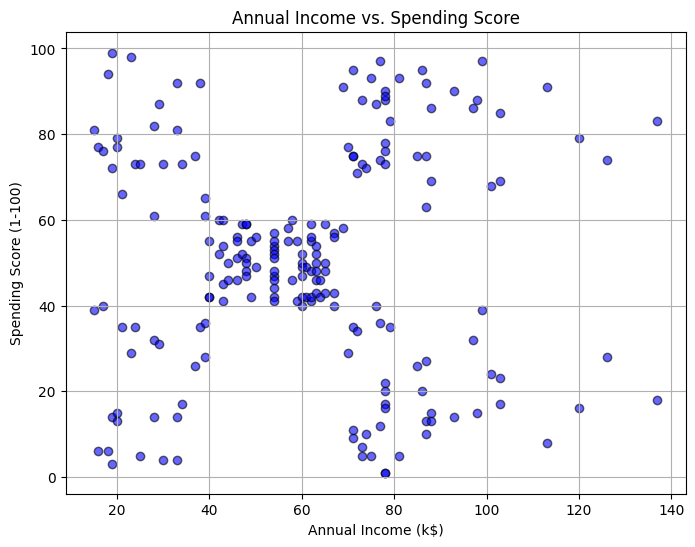

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading the dataset
df = pd.read_csv("/content/sample_data/Mall_Customers.csv")

# Exploring the Dataset
print("First 5 rows:")
display(df.head())

print("\nDataset Info:")
print(df.info())

print("\nDescriptive Statistics:")
print(df.describe())

# Data Selection
# Keeping only 'Annual Income (k$)' and 'Spending Score (1-100)'
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]

print("\nSelected Features:")
display(X.head())

# 4. Initial Visualization
plt.figure(figsize=(8,6))
plt.scatter(X["Annual Income (k$)"], X["Spending Score (1-100)"], c="blue", alpha=0.6, edgecolors="k")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Annual Income vs. Spending Score")
plt.grid(True)
plt.show()


### Part 2: K-Means Clustering

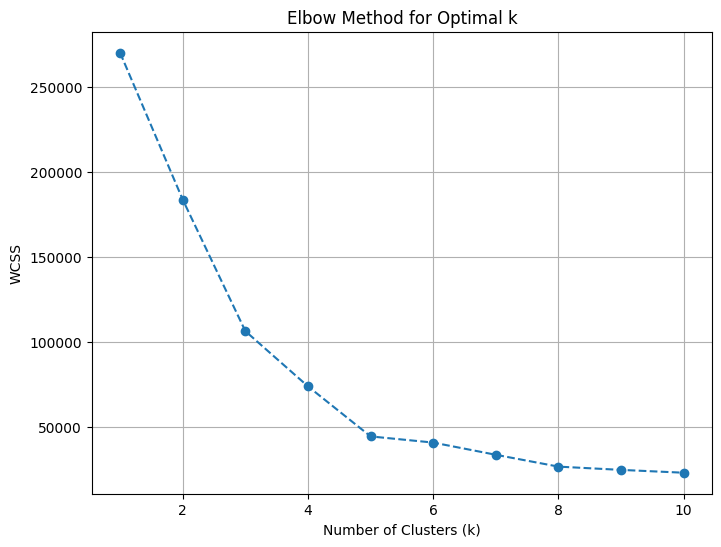

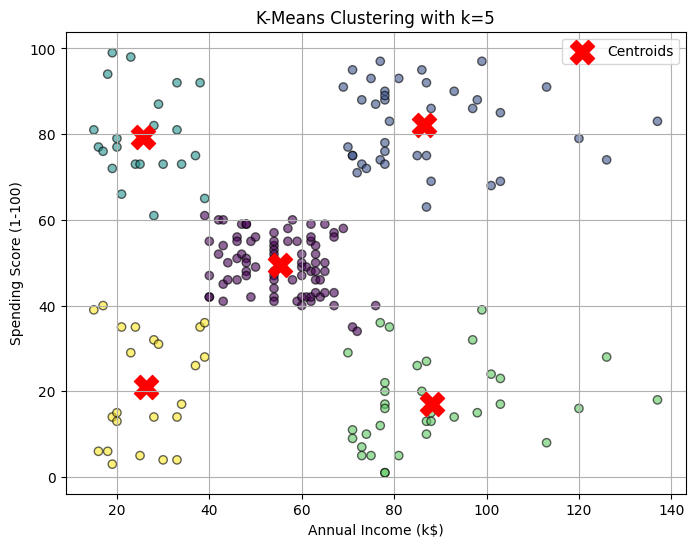

In [2]:
from sklearn.cluster import KMeans
import numpy as np

# Finding the Optimal Number of Clusters (Elbow Method)
wcss = []  # Within-Cluster Sum of Squares

# Testing k values from 1 to 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # inertia_ = WCSS

# Plotting the Elbow Method results
plt.figure(figsize=(8,6))
plt.plot(range(1, 11), wcss, marker="o", linestyle="--")
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()

# Applying K-Means
# From the elbow plot, choosing the optimal k (often around 5 for this dataset)
optimal_k = 5

kmeans = KMeans(n_clusters=optimal_k, init="k-means++", random_state=42)
y_kmeans = kmeans.fit_predict(X)  # cluster labels for each point

# Visualizing K-Means Results
plt.figure(figsize=(8,6))
plt.scatter(
    X["Annual Income (k$)"],
    X["Spending Score (1-100)"],
    c=y_kmeans, cmap="viridis", alpha=0.6, edgecolors="k"
)

# Plotting cluster centroids
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0], centroids[:, 1],
    s=300, c="red", marker="X", label="Centroids"
)

plt.title(f"K-Means Clustering with k={optimal_k}")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.grid(True)
plt.show()


### Part 3: Agglomerative Hierarchical Clustering

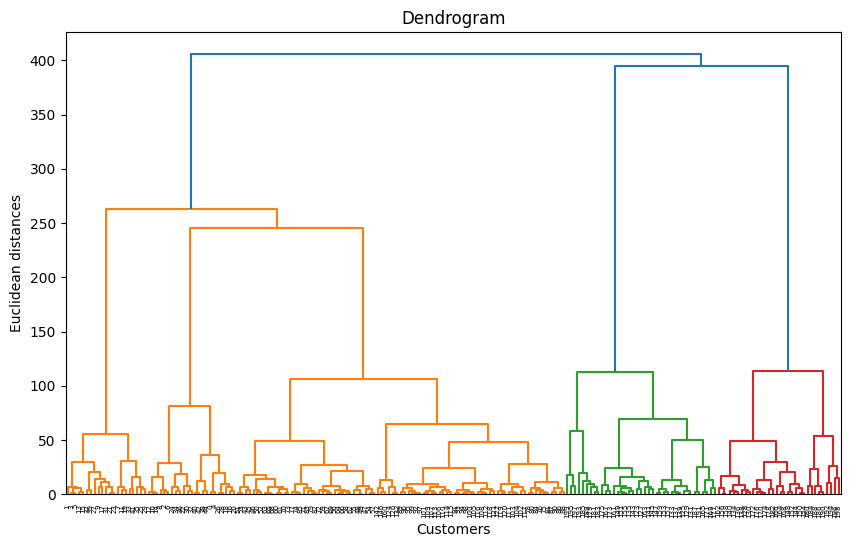

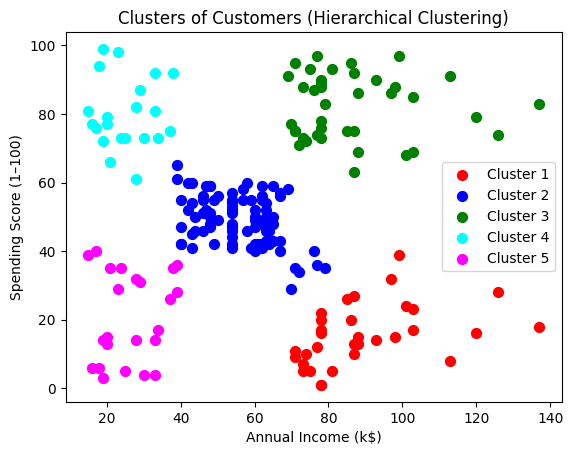

In [3]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# Dendrogram
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(X, method="ward"))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean distances")
plt.show()

# Applying Agglomerative Clustering
# From the dendrogram, the optimal clusters are usually around 5
hc = AgglomerativeClustering(n_clusters=5, metric="euclidean", linkage="ward")
y_hc = hc.fit_predict(X)

# Visualization
# Converting X to a NumPy array for correct indexing
X_np = X.values
# Looping through clusters and plot
for i, color in enumerate(["red", "blue", "green", "cyan", "magenta"]):
    plt.scatter(X_np[y_hc == i, 0], X_np[y_hc == i, 1],
                s=50, c=color, label=f"Cluster {i+1}")

plt.title("Clusters of Customers (Hierarchical Clustering)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1–100)")
plt.legend()
plt.show()

### Part 4: DBSCAN Clustering

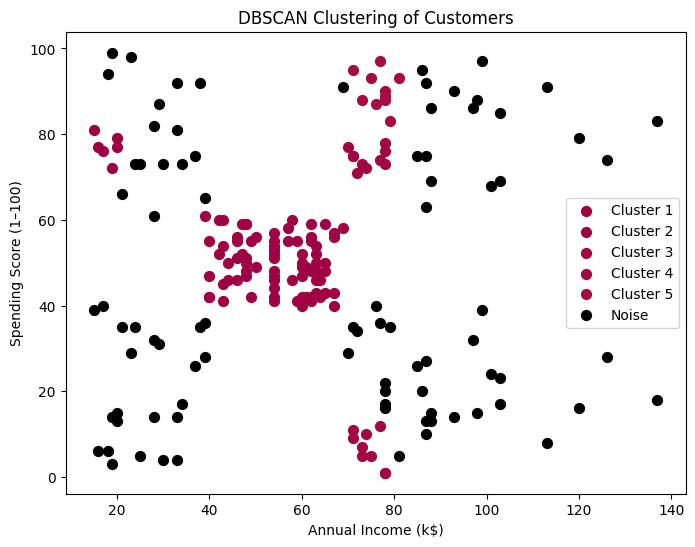

In [4]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Preparing the data (Annual Income & Spending Score)
X = df[["Annual Income (k$)", "Spending Score (1-100)"]].values

# Applying DBSCAN
dbscan = DBSCAN(eps=5, min_samples=5)
y_db = dbscan.fit_predict(X)

# Visualization
plt.figure(figsize=(8, 6))

# Unique cluster labels (including -1 for noise)
unique_labels = set(y_db)

# Assigning colors
colors = [plt.cm.Spectral(each) for each in range(len(unique_labels))]

for label, col in zip(unique_labels, colors):
    if label == -1:
        # Noise points is black here
        col = (0, 0, 0, 1)

    plt.scatter(
        X[y_db == label, 0],
        X[y_db == label, 1],
        s=50,
        c=[col],
        label=f"Cluster {label+1}" if label != -1 else "Noise"
    )

plt.title("DBSCAN Clustering of Customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1–100)")
plt.legend()
plt.show()